## Import libraries

In [23]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
sns.set_context('talk')
import nltk
#nltk.download('stopwords')

## Load data

In [24]:
df = pd.read_csv('data/courses.csv')
df = df.fillna("")
df.columns

df ['text'] = df['CourseDescription'] + df['CourseUnitGoals'] + df['CourseUnitOutcomes']
df  = df[['ID', 'text']]
df.head(1)

,ID,text
0,1,"Our graduates will be Experts, solving problem..."


## Building the model

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import pandas as pd
import re
import string

from nltk.stem.snowball import SnowballStemmer
stemmer= SnowballStemmer("english")

from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('english')
for sw in ['rt', 'http', 'https']:
    spanish_stopwords.append(sw)
    
punct_signs = list(string.punctuation)
punct_signs.append('…')
punct_signs.append('¿')
punct_signs.append('\n')

In [26]:
def clean_url(text):
    return re.sub(r"http\S+", "", text)

def vectorize_docs(docs_df, idxs):
    
    docs_array = list(docs_df.text.apply(lambda x: clean_url(x)))
    
    count_vectorizer = CountVectorizer(stop_words='english')
    count_vectorizer = CountVectorizer()
    sparse_matrix = count_vectorizer.fit_transform(docs_array)

    doc_term_matrix = sparse_matrix.todense()
    df = pd.DataFrame(doc_term_matrix, 
                      columns=count_vectorizer.get_feature_names(), 
                      index= idxs)
    return df 

In [27]:
idxs = list(df.index)
df_v = vectorize_docs(df, idxs)

#compute similarity
matrix = cosine_similarity(df_v, df_v)

#%
matrix  = matrix * 100

In [28]:
df.index

RangeIndex(start=0, stop=503, step=1)

In [34]:
df_v.shape

(503, 4449)

## Heatmap visualization - Similarity Matrix 

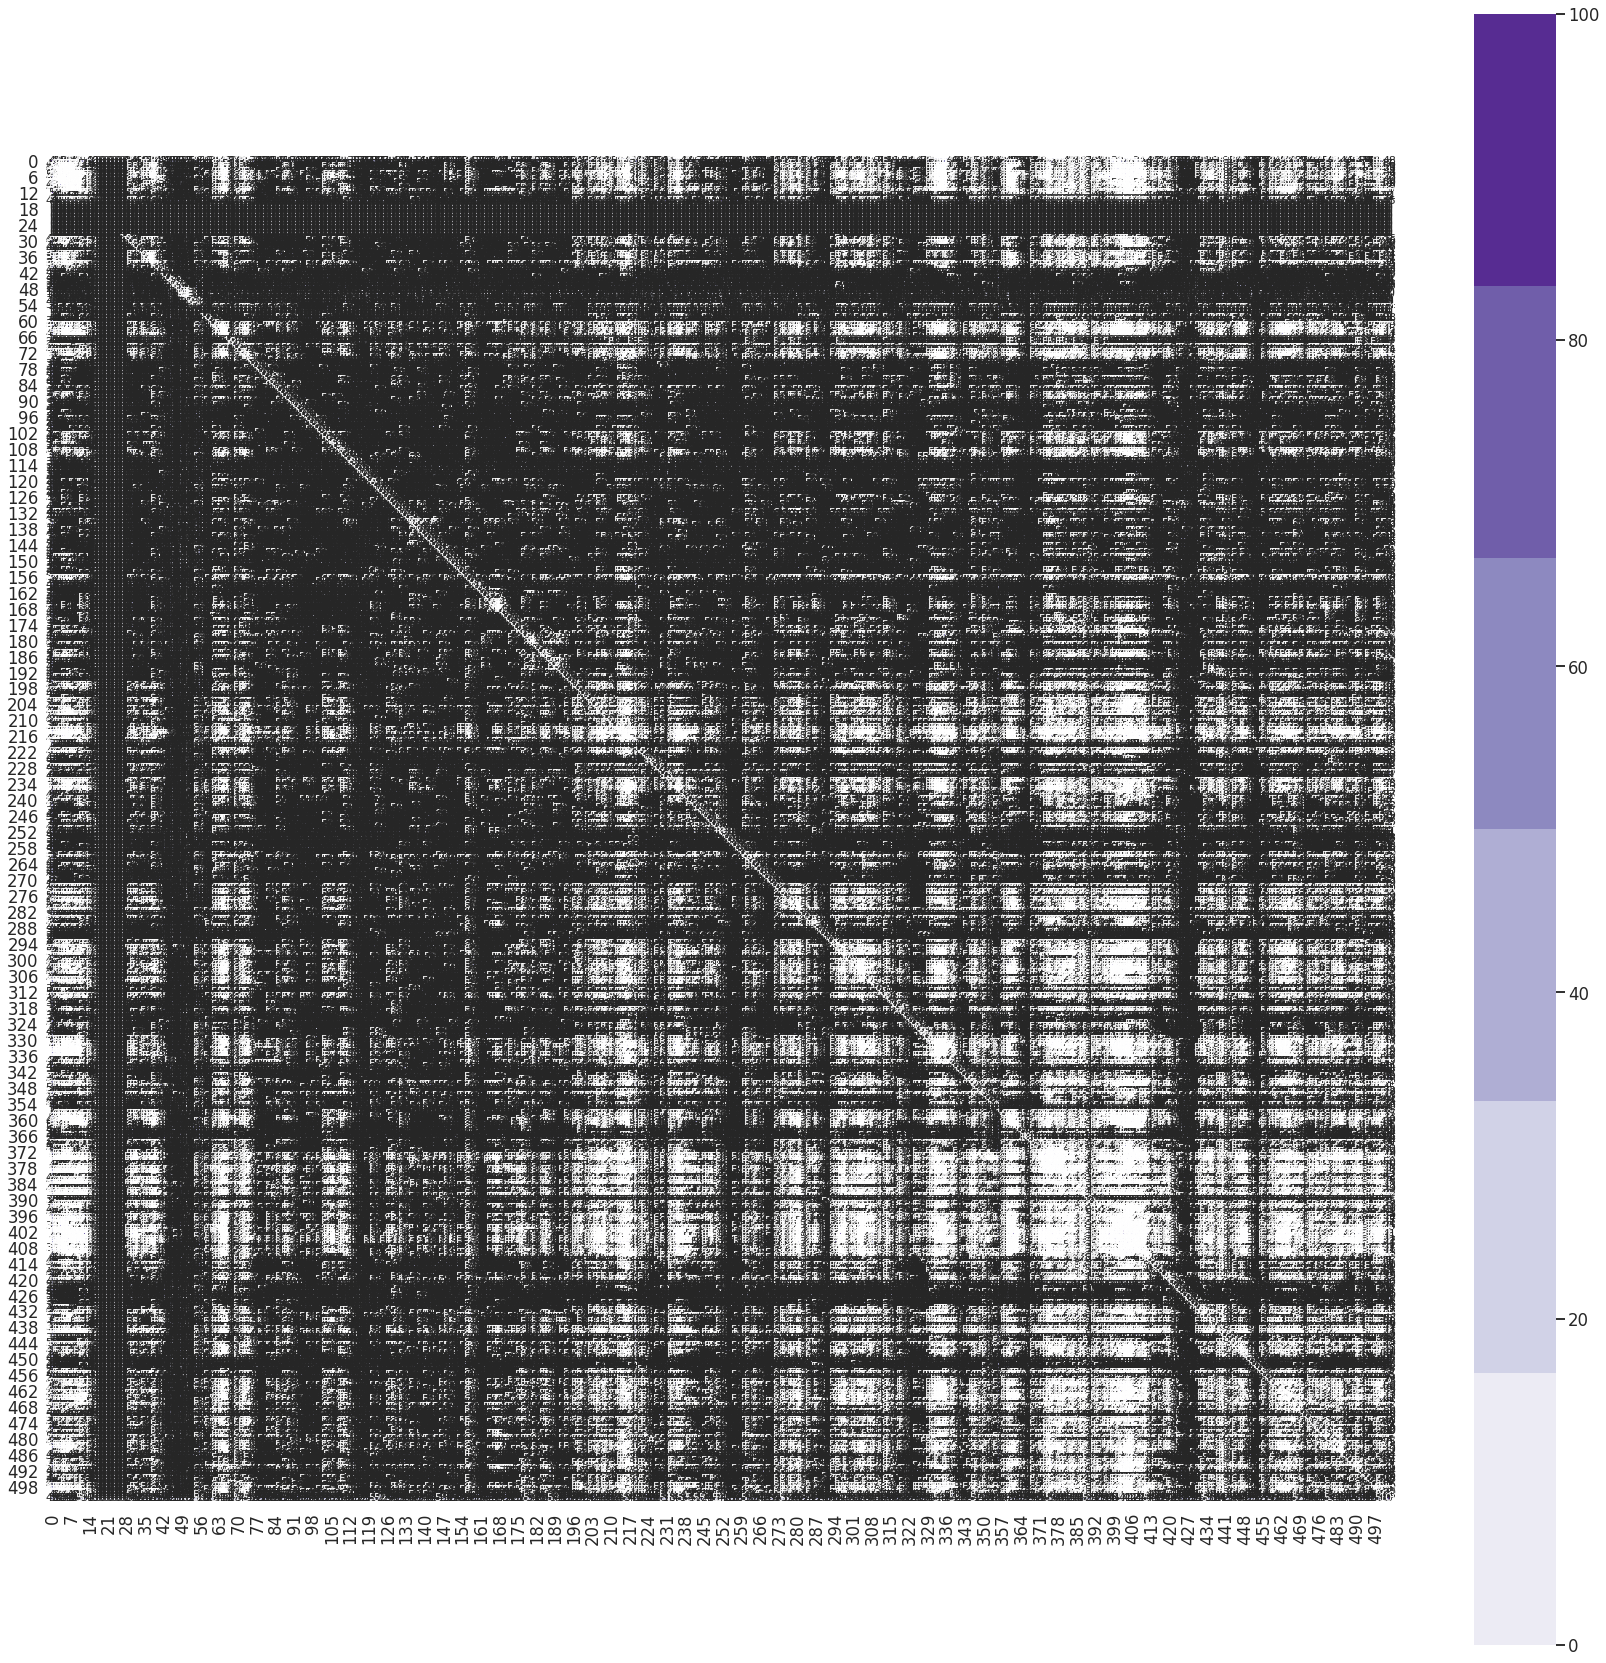

In [35]:
f1, ax1 = plt.subplots(figsize=(30, 30))
sns.heatmap(matrix, annot=True, fmt=".0f", mask=np.zeros_like(matrix, dtype=bool),
            cmap=sns.color_palette("Purples"), annot_kws={"size": 11}, square=True, ax=ax1)

#ax1.set_xticklabels(list(df_v.index), rotation=0);
#ax1.set_yticklabels(list(df_v.index), rotation=0);

legend_bar = ax1.collections[0].colorbar
#legend_bar.set_ticks([0, 10, 20, 30, 40, 50])
#legend_bar.set_ticklabels(['0%', '10%', '20%', '30%', '40%', '50%'])

bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)

plt.savefig('similaridad_anotada_percents.png', format='png', dpi=600, bbox_inches='tight')
plt.savefig('similaridad_anotada_percents.svg', format='svg', dpi=600, bbox_inches='tight')
plt.show()

## Top 10  most similar (?) courses

In [38]:
pd.set_option('display.max_colwidth', None)

df_top = pd.DataFrame(columns=['Document 1', 'Document 2', 'Similarity'])
for i in range(0,len(df)): 
    for j in range(0,len(df)): 
        if df.ID[i] != df.ID[j]:
            df_top = df_top.append({'Document 1':df.ID[i], 'Document 2': df.ID[j] , 
                                    'Similarity': matrix[i,j]}, ignore_index=True)

df_top = df_top.sort_values(by=['Similarity'], ascending=False)

In [43]:
df_top1 = df_top[:20]
#df_top1 = df_top1.drop_duplicates(subset=['Similarity'], keep='last')
df_top1

,Document 1,Document 2,Similarity
127258,254.0,253.0,100.000000
126756,253.0,254.0,100.000000
125745,251.0,246.0,100.000000
164482,328.0,330.0,100.000000
185599,370.0,362.0,100.000000
123239,246.0,251.0,100.000000
181590,362.0,370.0,100.000000
165485,330.0,328.0,100.000000
113678,227.0,228.0,100.000000
114180,228.0,227.0,100.000000


## Top most dissimilar docs

In [44]:
df_top2 = df_top[-20:]
#df_top2 = df_top2.drop_duplicates(subset=['Similarity'], keep='last')
df_top2

,Document 1,Document 2,Similarity
14184,29.0,130.0,0.0
14185,29.0,131.0,0.0
197814,395.0,27.0,0.0
14186,29.0,132.0,0.0
14187,29.0,133.0,0.0
14188,29.0,134.0,0.0
14189,29.0,135.0,0.0
14190,29.0,136.0,0.0
14191,29.0,137.0,0.0
197815,395.0,28.0,0.0


## Descripción estadística de la Similaridad 

In [48]:
df_top3 = df_top.drop_duplicates(subset=['Similarity'], keep='last')
df_top3 = df_top3[['Similarity']]
df_top3.describe()

,Similarity
count,92669.000000
mean,41.070595
std,14.214450
min,0.000000
25%,31.549902
50%,41.727646
75%,51.029529
max,100.000000


In [46]:
df_top.shape

(252506, 3)